## Prueba de bondad de ajuste

### Ejercicio 1
Los pesos máximos que soportan unos cables producidos por una compañía se muestran a continuación:

| Pesos Máximos(en Toneladas)	 | Frecuencias Observadas|
|--------------------------------|-----------------------|
| 8.3 a 9.75	    |1|
| 9.8 a 10.25	    |5|
| 10.25 a 10.75	|4|
| 10.75 a 11.25	|14|
| 11.25 a 11.75	|28|
| 11.75 a 12.25	|42|
| 12.25 a 12.75	|29|
| 12.75 a 13.25	|6|
| 13.25 a 13.75	|5|
| 13.75 a 15.25	|2|

Se solicita determinar si los valores se ajustan a una distribución normal con α = 0,10.

In [60]:
from scipy.stats import norm, chi2
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

[[ 9.75 10.25 10.75 11.25 11.75 12.25 12.75 13.25 13.75 15.25]
 [ 1.    5.    4.   14.   28.   42.   29.    6.    5.    2.  ]]
mu =  12.85 std =  9.6945216488489


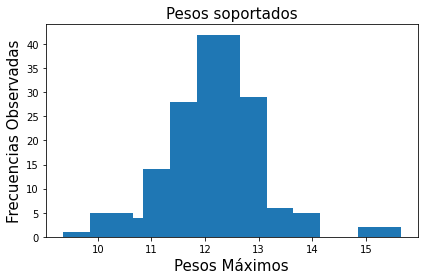

|   Limites |   Valores |
|-----------|-----------|
|      9.75 |         1 |
|     10.25 |         5 |
|     10.75 |         4 |
|     11.25 |        14 |
|     11.75 |        28 |
|     12.25 |        42 |
|     12.75 |        29 |
|     13.25 |         6 |
|     13.75 |         5 |
|     15.25 |         2 |
9.75


In [47]:
f = open('ejercicio1.txt','r')
data = np.loadtxt(f, unpack=True, usecols=[1, 2], delimiter=',', dtype=float)
print (data)

mu, std = norm.fit(data) 
print ('mu = ', mu, 'std = ', std)

plt.bar(data[0], data[1])
plt.tick_params(axis='x',labelsize= 10)
plt.xlabel('Pesos Máximos',fontsize=15)
plt.ylabel('Frecuencias Observadas',fontsize=15)
plt.title('Pesos soportados',fontsize=15)
plt.tight_layout()
plt.show()
tableData = list(zip(data[0],data[1]))
print(tabulate(tableData, ['Limites', 'Valores'], tablefmt="github"))


In [59]:
# prob = norm.cdf(data[0][1:], mu, std)

out = []
acc = 0
for(i) in range(data[0].size):
    prob = norm.cdf(data[0][i], mu, std)
    if i == 0:
        print('P(X < ', data[0][i], ') = ', prob)
    else:
        prob -= norm.cdf(data[0][i-1], mu, std)
        print('P(',data[0][i-1] ,'< X < ', data[0][i], ') = ', prob)
    out += [i, prob]
    acc += prob

prob = 1 - norm.cdf(data[0][data[0].size-1], mu, std)
print('P(X > ', data[0][data[0].size-1], ') = ', prob)

out += [i, prob]
acc += prob

print (acc)


P(X <  9.75 ) =  0.37457201754715974
P( 9.75 < X <  10.25 ) =  0.01970347681829776
P( 10.25 < X <  10.75 ) =  0.01997785122128387
P( 10.75 < X <  11.25 ) =  0.020202248069338846
P( 11.25 < X <  11.75 ) =  0.020374907349986315
P( 11.75 < X <  12.25 ) =  0.020494465831452757
P( 12.25 < X <  12.75 ) =  0.020559974985329632
P( 12.75 < X <  13.25 ) =  0.020570913517490075
P( 13.25 < X <  13.75 ) =  0.020527194275701266
P( 13.75 < X <  15.25 ) =  0.06078048561221128
P(X >  15.25 ) =  0.40223646477174846
1.0
